# E-Commerce Insights: Predicting Customer Purchases

In this analysis, we aim to explore how customer interactions with online store content influence their purchasing decisions. The dataset provided comes from a startup's newly launched e-commerce platform, and my role as a data scientist is to analyze the shopping behavior of online customers. The marketing team has requested insights into user browsing patterns during November and December, the peak shopping months of the year. To address this, I focused on two key customer segments: those with lower purchase rates and returning customers. By examining these groups, we can estimate the likelihood of making a purchase during an upcoming marketing campaign, helping the team assess the potential success of next year's sales strategies.

### Dataset Overview:
The dataset, online_shopping_session_data.csv, contains detailed information for each unique shopping session, with various columns representing user actions and session characteristics.

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

## Step 1: Load and Explore the Data
The first step involves loading the data to familiarize yourself with the columns and values. We need to verify that the dataset contains relevant information such as session details, customer type, and purchase decisions.

**Tip:**
Always check the dataset’s structure before starting any analysis, so you know which variables you’ll be working with.

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


## Step 2: Filter Data for November and December
Since the marketing team is interested in the busiest shopping months, we narrow down the dataset to only November and December. This step is crucial for focusing the analysis on the time frame of interest.

**Tip:** Always tailor your dataset to the specific time periods or user groups that align with your business goals or research questions.

In [29]:
# Subset the data to include only November and December sessions
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

## Step 3: Calculate Purchase Rates by Customer Type
The goal is to calculate the purchase rates for both returning and new customers during November and December. By grouping by customer type and calculating the proportion of purchases, we can determine their likelihood to make a purchase.

**Tip:** Always aggregate your data based on relevant variables, such as customer type, to draw actionable insights about user behavior.

In [31]:
# Group by 'CustomerType' and calculate total sessions and purchases
purchase_rates = nov_dec_data.groupby('CustomerType')['Purchase'].agg(
    total_sessions='size',  # Count of sessions
    total_purchases='sum'   # Count of purchases (since Purchase is binary, sum will give total purchases)
)

# Calculate the purchase rates
purchase_rates['purchase_rate'] = purchase_rates['total_purchases'] / purchase_rates['total_sessions']

# Convert to dictionary format
purchase_rates = {
    "Returning_Customer": purchase_rates.loc['Returning_Customer', 'purchase_rate'],
    "New_Customer": purchase_rates.loc['New_Customer', 'purchase_rate']
}

print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


### Insights
* **Returning Customers:**
The purchase rate for returning customers during November and December is around 19.6%. This indicates that about 1 in 5 returning customers is likely to make a purchase.

* **New Customers:**
New customers have a higher purchase rate of approximately 27.3%, meaning that over 1 in 4 new customers is making a purchase during this time.

* **Key Takeaway:**
The data suggests that new customers are more likely to make a purchase than returning customers during the busy shopping months of November and December. This could be due to a higher level of curiosity and exploration among new users, or possibly targeted promotional efforts aimed at new customers.

## Step 4: Identify the Strongest Correlation Among Duration Variables
We aim to identify which types of pages users spend the most correlated time on. This can help us understand user behavior patterns. The stronger the correlation, the more connected the page engagement behaviors are.

**Tip:** Use correlations to uncover hidden relationships between user interactions. These insights could guide improvements to website navigation or content placement.

In [41]:
# Subset the data for November and December
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Select the relevant duration columns
duration_data = nov_dec_data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# Calculate the correlations between each pair of duration variables
admin_info_corr = duration_data['Administrative_Duration'].corr(duration_data['Informational_Duration'])
admin_prod_corr = duration_data['Administrative_Duration'].corr(duration_data['ProductRelated_Duration'])
info_prod_corr = duration_data['Informational_Duration'].corr(duration_data['ProductRelated_Duration'])

# tore the correlations in a dictionary for easy comparison
correlation_dict = {
    ('Administrative_Duration', 'Informational_Duration'): admin_info_corr,
    ('Administrative_Duration', 'ProductRelated_Duration'): admin_prod_corr,
    ('Informational_Duration', 'ProductRelated_Duration'): info_prod_corr
}

# Find the pair with the strongest correlation
strongest_pair = max(correlation_dict, key=correlation_dict.get)
strongest_correlation = correlation_dict[strongest_pair]

# Save the result in the required format
top_correlation = {
    "pair": strongest_pair,
    "correlation": strongest_correlation
}

print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.38985460032069624}


### Insights:
* **Strongest Correlation:**
The strongest correlation found was between the Administrative_Duration and ProductRelated_Duration, with a correlation coefficient of 0.39.

* **What This Means:**
Although the correlation is moderate, it suggests that when users spend more time on administrative pages (e.g., account-related tasks), they also tend to spend more time browsing product-related pages. This may indicate that users are engaging in more comprehensive shopping behavior, managing their accounts and browsing products during the same session.

* **Key Takeaway:**
Enhancing the user experience on administrative pages (such as simplifying account management) could potentially improve engagement with product-related pages, ultimately driving more purchases.

## Step 5: Calculate the Binomial Probability of Sales
After boosting the purchase rate by 15%, we calculate the probability of making at least 100 sales out of 500 sessions using a binomial distribution. This provides insights into the success of the marketing campaign.

**Tip:** Binomial probability is useful when analyzing binary outcomes (e.g., purchase vs. no purchase). Always consider cumulative probabilities to calculate the likelihood of reaching certain targets.

### Optional: Plot the Binomial Probability Distribution
Visualizing the distribution of sales helps better understand where most of the probability lies and gives stakeholders a clearer picture of campaign outcomes.

**Tip:** Visualizing your data is often more impactful than raw numbers, especially when communicating insights to non-technical stakeholders.

Probability of at least 100 sales: 0.9012246009073177


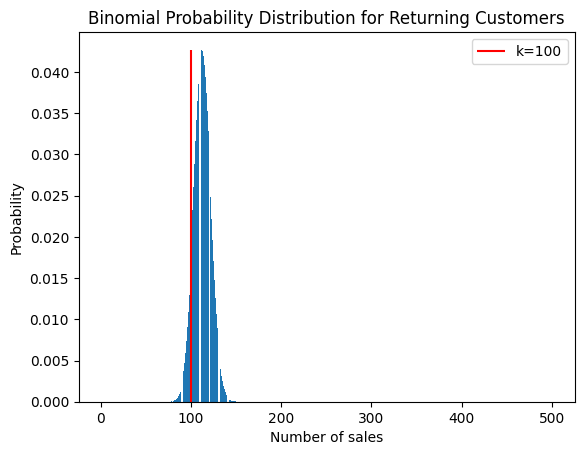

In [33]:
from scipy.stats import binom

# Step 1: Calculate the improved purchase rate for returning customers
current_purchase_rate = 0.195594  # From Step 1 results
improved_purchase_rate = current_purchase_rate * 1.15

# Step 2: Define the number of sessions and the target sales
n_sessions = 500
k_sales = 100

# Step 3: Calculate the cumulative probability of having 100 or fewer sales
prob_less_than_100 = binom.cdf(k_sales, n_sessions, improved_purchase_rate)

# Step 4: Calculate the probability of having at least 100 sales
prob_at_least_100_sales = 1 - prob_less_than_100

print(f"Probability of at least 100 sales: {prob_at_least_100_sales}")

# Optional: Plot the binomial probability distribution (optional)
import matplotlib.pyplot as plt
k_values = range(1, n_sessions + 1)
binom_probs = [binom.pmf(k, n_sessions, improved_purchase_rate) for k in k_values]

plt.bar(k_values, binom_probs)
plt.vlines(k_sales, 0, max(binom_probs), colors='r', label='k=100')
plt.xlabel('Number of sales')
plt.ylabel('Probability')
plt.title('Binomial Probability Distribution for Returning Customers')
plt.legend()
plt.show()


### Insights:
* **Probability of Success:**
With a 15% boost in the purchase rate for returning customers, there is a 90.1% chance of achieving at least 100 sales out of 500 sessions. This high probability suggests that the marketing campaign targeting returning customers has a strong chance of meeting its sales target.

* **Key Takeaway:**
The boosted purchase rate significantly increases the likelihood of achieving the sales goal, making this an optimistic outcome for the campaign. However, further analysis might be needed to confirm whether these results align with actual user behavior over a larger timeframe or during different promotional events.